# Earthquake dataset

**We will create a machine learning model to predict the magnitude of an earthquake**

#### Importing the required libraries

In [590]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [591]:
df = pd.read_csv('Earthquake.csv')

In [592]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,1/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,1/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,1/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

*The dataset has **9 categorical columns** and **12 numerical columns**. Some columns have missing values. The shape of the dataframe shows that there 23412 rows in the dataset and 21 columns/features*

In [594]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Now we will check for duplicates

In [595]:
df.duplicated().sum()

0

*There are no duplicate rows*

#### Splitting the dataset into training and testing datasets

In [596]:
X = df.drop(columns=["Magnitude"], axis=1)
Y = df.Magnitude

In [597]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42, shuffle=True)

Joining the training dataframe

In [598]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [599]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [600]:
df_train.reset_index(inplace = True, drop = True)

In [601]:
df_test.reset_index(inplace = True, drop = True)

The indices have been reset in the training and testing dataframes

In [602]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21070 entries, 0 to 21069
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        21070 non-null  object 
 1   Time                        21070 non-null  object 
 2   Latitude                    21070 non-null  float64
 3   Longitude                   21070 non-null  float64
 4   Type                        21070 non-null  object 
 5   Depth                       21070 non-null  float64
 6   Depth Error                 4026 non-null   float64
 7   Depth Seismic Stations      6383 non-null   float64
 8   Magnitude Type              21068 non-null  object 
 9   Magnitude Error             304 non-null    float64
 10  Magnitude Seismic Stations  2339 non-null   float64
 11  Azimuthal Gap               6578 non-null   float64
 12  Horizontal Distance         1454 non-null   float64
 13  Horizontal Error            105

In [603]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2342 non-null   object 
 1   Time                        2342 non-null   object 
 2   Latitude                    2342 non-null   float64
 3   Longitude                   2342 non-null   float64
 4   Type                        2342 non-null   object 
 5   Depth                       2342 non-null   float64
 6   Depth Error                 435 non-null    float64
 7   Depth Seismic Stations      714 non-null    float64
 8   Magnitude Type              2341 non-null   object 
 9   Magnitude Error             23 non-null     float64
 10  Magnitude Seismic Stations  225 non-null    float64
 11  Azimuthal Gap               721 non-null    float64
 12  Horizontal Distance         150 non-null    float64
 13  Horizontal Error            104 n

In [604]:
df_train.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   17044
Depth Seismic Stations        14687
Magnitude Type                    2
Magnitude Error               20766
Magnitude Seismic Stations    18731
Azimuthal Gap                 14492
Horizontal Distance           19616
Horizontal Error              20018
Root Mean Square               5445
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
Magnitude                         0
dtype: int64

*There are high number of **missing values** in the columns **Depth Error**, **Depth Seismic Stations**, **Magnitude Error**, **Magnitude Seismic Stations**, **Azimuthal Gap**, **Horizontal Distance** and **Horizontal Error**. We can drop these columns as they large number of missing values. For **Root Mean Square** column, we can replace the missing values with mean/median value*

In [605]:
df_train = df_train.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error'], axis=1)

In [606]:
df_train = df_train.dropna(subset=['Magnitude Type'])

*We have dropped the rows corresponding to the 3 missing values in the column **Magnitude Type**. For the remaining column with missing values, we will impute the them with **mean/median** depending upon the distribution*

In [607]:
df_train.isnull().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude Type         0
Root Mean Square    5443
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
Magnitude              0
dtype: int64

#### Checking for unique values

In [608]:
df_train.nunique()

Date                11731
Time                18695
Latitude            18809
Longitude           19493
Type                    4
Depth                3274
Magnitude Type         10
Root Mean Square      185
ID                  21068
Source                 12
Location Source        46
Magnitude Source       23
Status                  2
Magnitude              61
dtype: int64

In [609]:
df_train.shape

(21068, 14)

*The **ID column** has all almost **unique values** and thus it does not contribute to determine the magnitude of the earthquake. So we can drop the ID column*

In [610]:
df_train = df_train.drop(['ID'], axis = 1)

In [611]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,5/21/2000,19:58:47,71.190,-8.263,Earthquake,10.0,MWC,0.95,US,US,HRV,Reviewed,6.0
1,5/3/1996,3:07:13,-7.310,155.282,Earthquake,33.0,MWC,1.20,US,US,HRV,Reviewed,5.6
2,7/16/2007,6:37:40,37.502,138.467,Earthquake,15.1,MWC,0.71,US,US,GCMT,Reviewed,5.7
3,1/24/2004,13:01:46,52.122,-30.179,Earthquake,10.0,MWB,0.83,US,US,US,Reviewed,5.9
4,6/20/1980,18:51:31,-10.965,119.103,Earthquake,33.0,MB,NaN,US,US,US,Reviewed,5.6


In [612]:
df_train.nunique()

Date                11731
Time                18695
Latitude            18809
Longitude           19493
Type                    4
Depth                3274
Magnitude Type         10
Root Mean Square      185
Source                 12
Location Source        46
Magnitude Source       23
Status                  2
Magnitude              61
dtype: int64

In [613]:
NaN_features = [feature for feature in df_train.columns if (df_train[feature].count() < df_train.shape[0])]
NaN_features

['Root Mean Square']

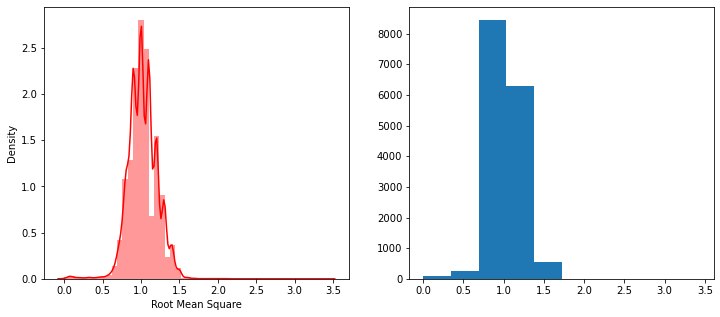

In [614]:
for feature in NaN_features:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(df_train[feature], color='red')
    plt.subplot(1,2,2)
    plt.hist(df_train[feature])

*These above plotted feature has missing values. We need to impute the missing values in these columns. For the feature **Root mean square**, we can use **median** to impute*

In [615]:
df_train['Root Mean Square'] = df_train['Root Mean Square'].fillna(df_train['Root Mean Square'].mean())

In [616]:
df_train.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Magnitude           0
dtype: int64

In [617]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21068 entries, 0 to 21069
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              21068 non-null  object 
 1   Time              21068 non-null  object 
 2   Latitude          21068 non-null  float64
 3   Longitude         21068 non-null  float64
 4   Type              21068 non-null  object 
 5   Depth             21068 non-null  float64
 6   Magnitude Type    21068 non-null  object 
 7   Root Mean Square  21068 non-null  float64
 8   Source            21068 non-null  object 
 9   Location Source   21068 non-null  object 
 10  Magnitude Source  21068 non-null  object 
 11  Status            21068 non-null  object 
 12  Magnitude         21068 non-null  float64
dtypes: float64(5), object(8)
memory usage: 2.3+ MB


#### Plotting a heatmap to see the correlation between the numerical features

<AxesSubplot:>

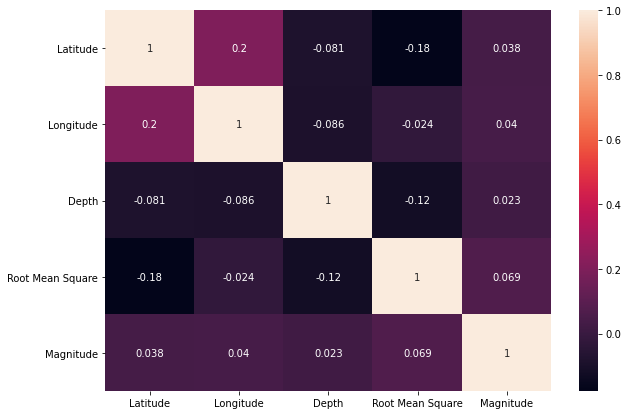

In [618]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(), annot=True)

*We can see that the features are weakly correlated to one another*

Extracting the continuous features from the data

In [619]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns]

In [620]:
print(continuous_features)

['Latitude', 'Longitude', 'Depth', 'Root Mean Square', 'Magnitude']


Extracting the categorical features from the data

In [621]:
categorical_features = [feature for feature in df_train.select_dtypes(np.object).columns]

In [622]:
categorical_features

['Date',
 'Time',
 'Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

#### Plotting boxplots and distplots to see the outliers and skewness for the numerical features

In [623]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(5,5))
        dataset.boxplot(column=feature)
        plt.ylabel(feature)

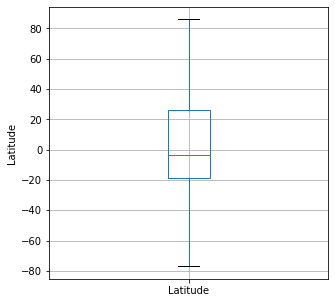

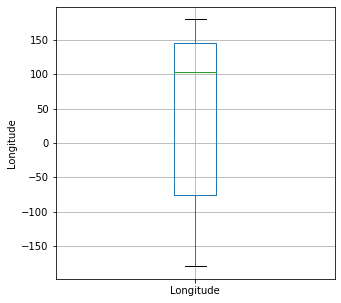

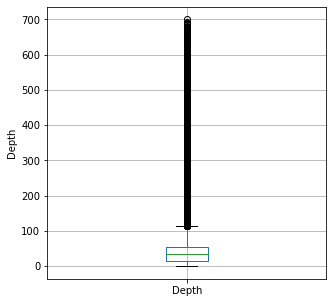

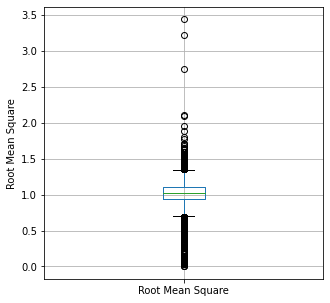

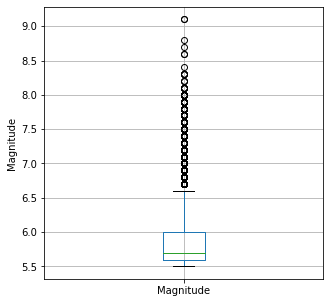

In [624]:
create_boxplots(df_train, continuous_features)

In [625]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [626]:
remove_outliers(df_train, continuous_features)

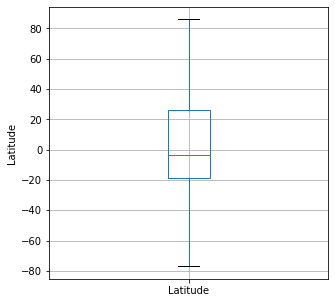

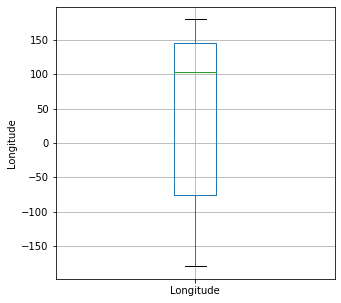

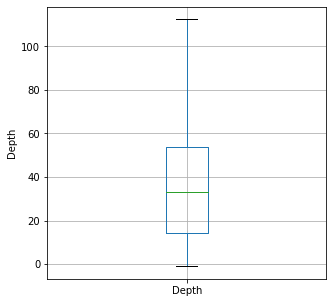

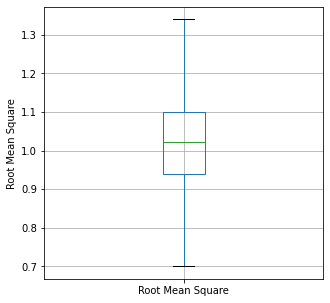

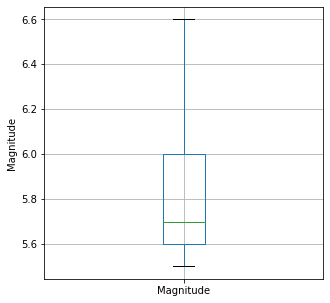

In [627]:
create_boxplots(df_train, continuous_features)

*The outliers have been removed*

#### Now we will check for multivariate outliers by plotting relplot

In [628]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

In [629]:
#create_relplot(df_train, continuous_features, 'Magnitude')

In [630]:
df_train = df_train.drop(df_train[(df_train['Latitude'] < -70)].index)

In [631]:
df_train = df_train.drop(df_train[(df_train['Latitude'] < -60) & (df_train['Longitude'] > 100) & (df_train['Longitude'] < 125)].index)

In [632]:
df_train = df_train.drop(df_train[(df_train['Latitude'] > 70) & (df_train['Longitude'] > -150) & (df_train['Longitude'] < -50)].index)

In [633]:
df_train = df_train.drop(df_train[(df_train['Latitude'] > 75) & (df_train['Root Mean Square'] > 1.15)].index)

*We have removed the multivariate outliers from the dataset*

In [634]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,5/21/2000,19:58:47,71.190,-8.263,Earthquake,10.0,MWC,0.95000,US,US,HRV,Reviewed,6.0
1,5/3/1996,3:07:13,-7.310,155.282,Earthquake,33.0,MWC,1.20000,US,US,HRV,Reviewed,5.6
2,7/16/2007,6:37:40,37.502,138.467,Earthquake,15.1,MWC,0.71000,US,US,GCMT,Reviewed,5.7
3,1/24/2004,13:01:46,52.122,-30.179,Earthquake,10.0,MWB,0.83000,US,US,US,Reviewed,5.9
4,6/20/1980,18:51:31,-10.965,119.103,Earthquake,33.0,MB,1.02247,US,US,US,Reviewed,5.6


#### Applying square root transformation to treat skewness

In [635]:
from scipy.stats import skew

In [636]:
df_train.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Magnitude           0
dtype: int64

In [637]:
for feature in continuous_features:
    print(feature, " ", skew(df_train[feature]))

Latitude   0.09764247732463184
Longitude   -0.6005634524768666
Depth   1.0679480885769326
Root Mean Square   0.13811551153142348
Magnitude   0.9086914842450036


In [638]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

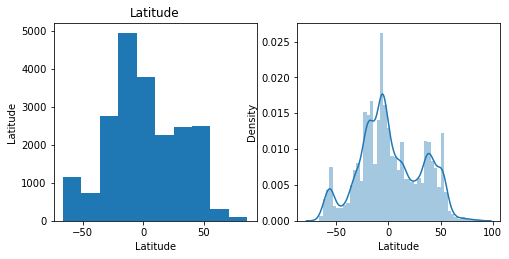

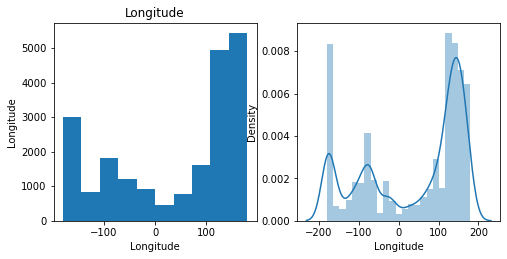

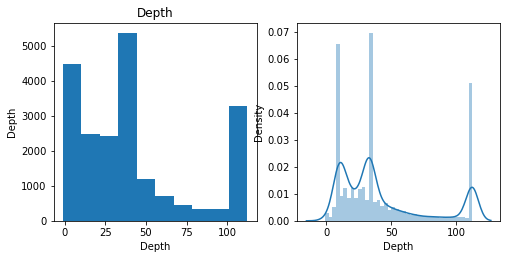

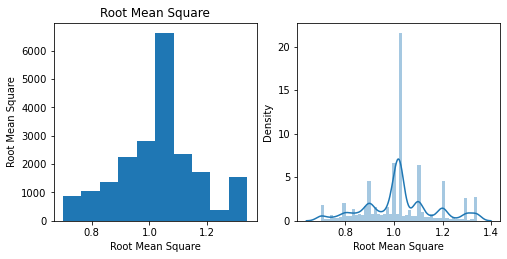

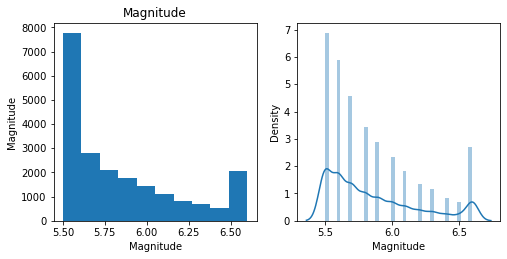

In [639]:
create_histograms_distplots(df_train, continuous_features)

In [640]:
df_train.shape

(21058, 13)

In [641]:
df_train.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Magnitude           0
dtype: int64

In [642]:
#skewed_features = ['Longitude', 'Depth', 'Magnitude']
skewed_features = ['Magnitude']
#skewed_features = ['Magnitude', 'Depth']
for feature in skewed_features:
    df_train[feature] = np.log(df_train[feature] + 1)

In [643]:
for feature in continuous_features:
    print(feature, " ", skew(df_train[feature]))

Latitude   0.09764247732463184
Longitude   -0.6005634524768666
Depth   1.0679480885769326
Root Mean Square   0.13811551153142348
Magnitude   0.8434994388734808


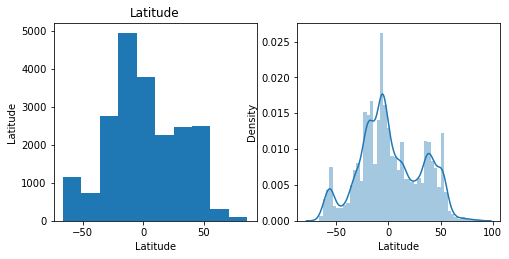

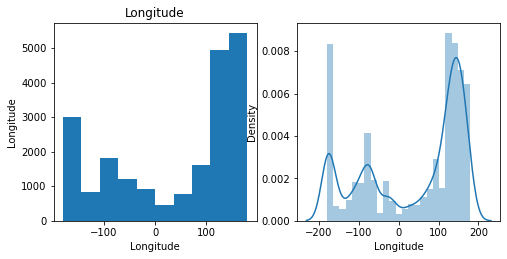

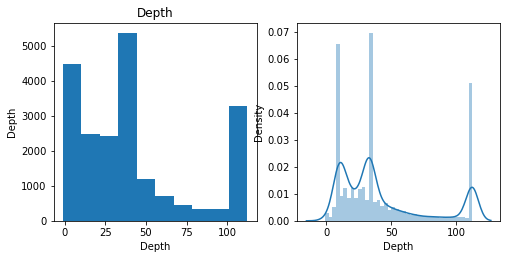

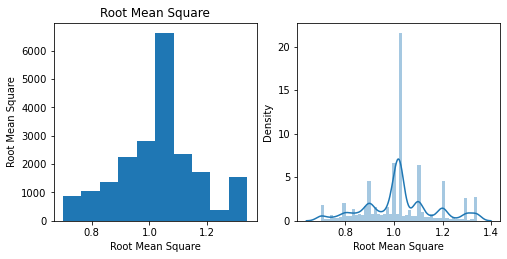

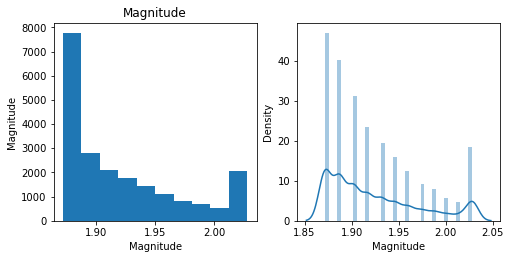

In [644]:
create_histograms_distplots(df_train, continuous_features)

*Skewness has been handled*

#### Analysing categorical features

In [645]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,5/21/2000,19:58:47,71.190,-8.263,Earthquake,10.0,MWC,0.95000,US,US,HRV,Reviewed,1.945910
1,5/3/1996,3:07:13,-7.310,155.282,Earthquake,33.0,MWC,1.20000,US,US,HRV,Reviewed,1.887070
2,7/16/2007,6:37:40,37.502,138.467,Earthquake,15.1,MWC,0.71000,US,US,GCMT,Reviewed,1.902108
3,1/24/2004,13:01:46,52.122,-30.179,Earthquake,10.0,MWB,0.83000,US,US,US,Reviewed,1.931521
4,6/20/1980,18:51:31,-10.965,119.103,Earthquake,33.0,MB,1.02247,US,US,US,Reviewed,1.887070


In [646]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_train[feature].value_counts())
        print()

Feature :  Type
Earthquake           20897
Nuclear Explosion      156
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

Feature :  Magnitude Type
MW     6937
MWC    5109
MB     3381
MWB    2222
MWW    1777
MS     1530
ML       71
MWR      21
MD        5
MH        5
Name: Magnitude Type, dtype: int64

Feature :  Source
US           18535
ISCGEM        2232
ISCGEMSUP      110
CI              54
GCMT            52
NC              47
AK              11
OFFICIAL         7
UW               5
NN               3
SE               1
PR               1
Name: Source, dtype: int64

Feature :  Location Source
US        18283
ISCGEM     2343
CI           54
GCMT         53
NC           50
GUC          40
AEIC         37
UNM          18
WEL          18
AGS          16
PGC          16
ISK          14
AK           13
ATH          12
SPE          10
HVO          10
H             7
AEI           6
TEH           6
ROM           6
UW            5
NN            3
THR           3

*We can consider the Nuclear explosion and Explosion as 1 single category*

In [647]:
df_train["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

*For the above features, we will remove the categories having counts less than 4*

In [648]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time' or feature == 'Location Source':
        pass
    else:
        x = df_train[feature].value_counts().keys().tolist()
        y = df_train[feature].value_counts().tolist()
        for i in range(len(x)):
            if y[i] < 4:
                index_names = df_train[df_train[feature] == x[i]].index
                df_train.drop(index_names, inplace = True)
        x = None
        y = None

In [649]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_train[feature].value_counts())
        print()

Feature :  Type
Earthquake    20873
Explosion       160
Name: Type, dtype: int64

Feature :  Magnitude Type
MW     6931
MWC    5105
MB     3381
MWB    2222
MWW    1777
MS     1530
ML       66
MWR      11
MD        5
MH        5
Name: Magnitude Type, dtype: int64

Feature :  Source
US           18515
ISCGEM        2232
ISCGEMSUP      110
CI              54
GCMT            52
NC              47
AK              11
OFFICIAL         7
UW               5
Name: Source, dtype: int64

Feature :  Location Source
US        18267
ISCGEM     2343
CI           54
GCMT         53
NC           49
GUC          40
AEIC         37
UNM          18
WEL          18
AGS          16
PGC          16
ISK          14
AK           13
ATH          12
SPE          10
HVO          10
H             7
TEH           6
AEI           6
ROM           6
UW            5
THE           3
THR           3
RSPR          3
US_WEL        3
CASC          3
JMA           2
G             2
CSEM          1
OTT           1
UCR         

*We can group the categories of **Location Source** column for which the count is less than 29*

In [650]:
x = df_train['Location Source'].value_counts().keys().tolist()
y = df_train['Location Source'].value_counts().tolist()
for i in range(len(x)):
    if y[i] < 29:
        df_train['Location Source'].replace({x[i]: "Other"}, inplace=True)

In [651]:
df_train['Location Source'].value_counts()

US        18267
ISCGEM     2343
Other       190
CI           54
GCMT         53
NC           49
GUC          40
AEIC         37
Name: Location Source, dtype: int64

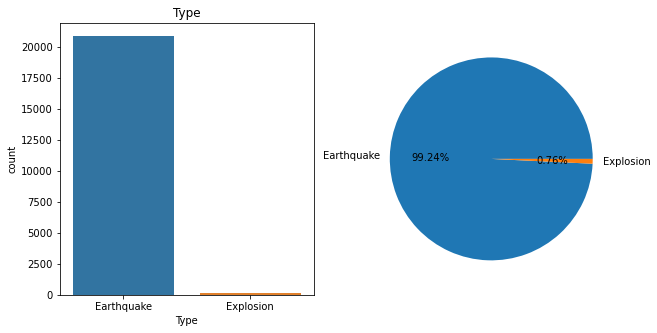

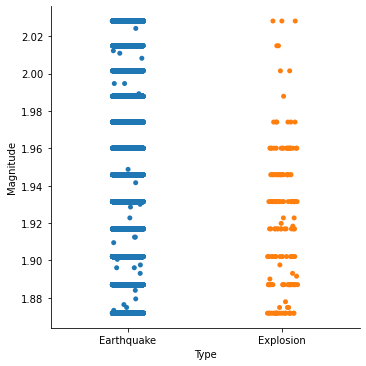

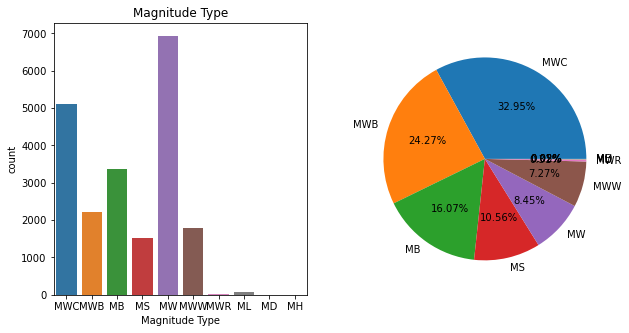

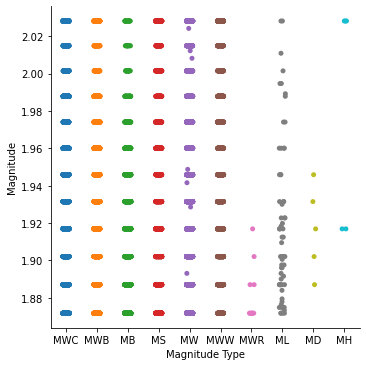

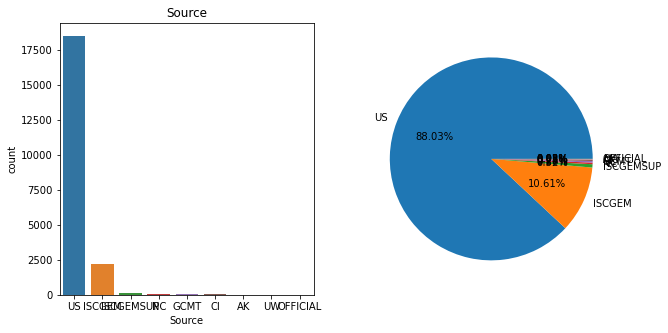

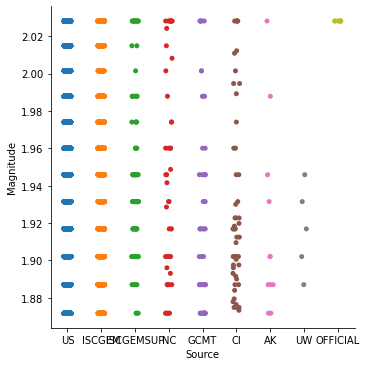

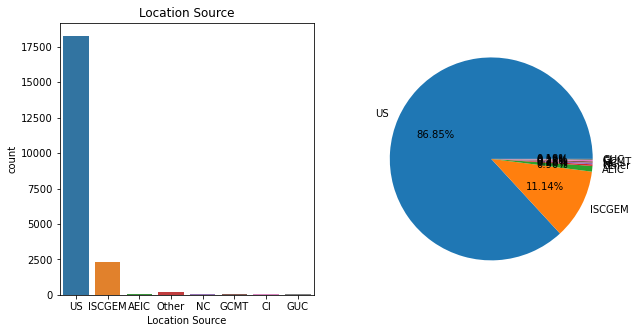

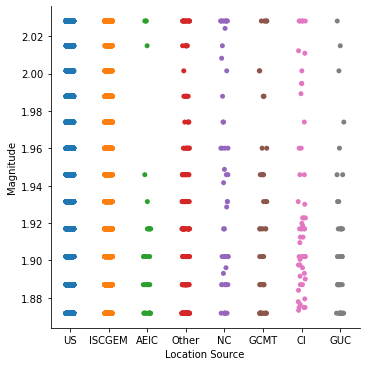

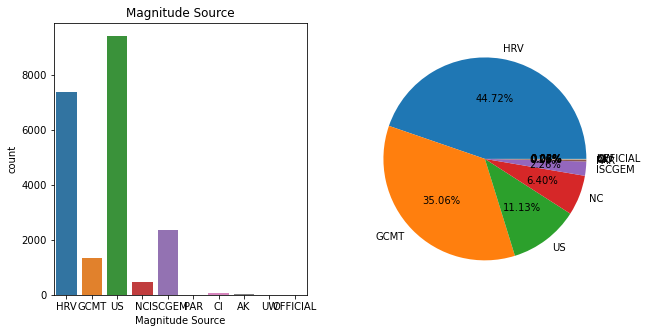

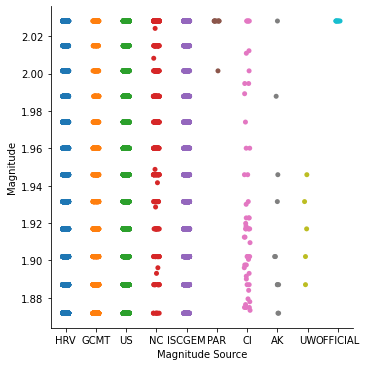

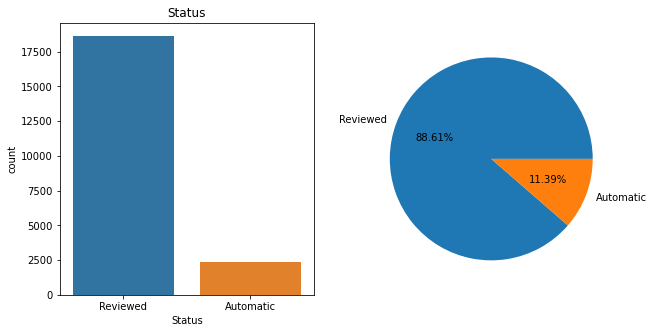

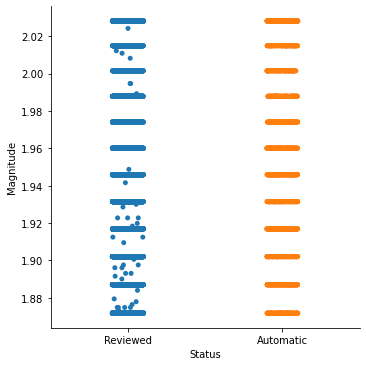

In [652]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        sns.countplot(feature, data=df_train)
        plt.title(feature)
        plt.subplot(1,2,2)
        plt.pie(df_train[feature].value_counts(), labels=df_train[feature].unique(), autopct='%0.2f%%')
        plt.show()
        sns.catplot(x=feature, y='Magnitude', data=df_train)
        plt.show()        

*From the plots, we can observe that most of the earthquakes are genuine earthquakes whereas very few earthquakes are due to explosions. 99.24% of the earthquakes are genuine earthquakes whereas 0.76% earthquakes are due to explosions. the magnitude of earthquake ranges from 2.35 to approx 2.70 for genuine earthquakes whereas the magnitude varies from 2.35 to 2.55 in the case of explosions*

*Magnitude Type glossary :*

     MWC : centroid
     MWW : (Moment W-phase)(generic notation Mw)
     MB : short-period body wave
     MWB : body wave
     MS : 20 sec surface wave
     MWW : Moment W-phase)(generic notation Mw
     MWR : regional
     ML : local

#### Working with Date and Time values

In [653]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21033 entries, 0 to 21069
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              21033 non-null  object 
 1   Time              21033 non-null  object 
 2   Latitude          21033 non-null  float64
 3   Longitude         21033 non-null  float64
 4   Type              21033 non-null  object 
 5   Depth             21033 non-null  float64
 6   Magnitude Type    21033 non-null  object 
 7   Root Mean Square  21033 non-null  float64
 8   Source            21033 non-null  object 
 9   Location Source   21033 non-null  object 
 10  Magnitude Source  21033 non-null  object 
 11  Status            21033 non-null  object 
 12  Magnitude         21033 non-null  float64
dtypes: float64(5), object(8)
memory usage: 2.8+ MB


*Date and Time columns are categorical features. We need to convert Date into datetime object*

In [654]:
df_train["Date"].replace({"1985-04-28T02:53:41.530Z": "4/28/1985"}, inplace=True)

In [655]:
df_train["Date"].replace({"2011-03-13T02:23:34.520Z": "3/13/2011"}, inplace=True)

In [656]:
df_train["Date"].replace({"1975-02-23T02:58:41.000Z": "2/23/1975"}, inplace=True)

In [657]:
df_train['Day'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.day

In [658]:
df_train['Month'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.month

In [659]:
df_train['Year'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.year

In [660]:
df_train['Year'].value_counts()

2011    632
2007    546
1995    524
2010    518
2004    513
2000    498
1996    492
1992    486
1990    473
2005    469
2009    468
1994    462
2006    461
2008    450
1987    447
1988    441
2014    435
2003    435
1984    434
1989    432
2016    431
1986    430
1985    427
1993    418
1997    409
1983    406
1999    406
1976    405
2012    404
2002    403
2013    402
2015    396
2001    391
1991    387
1978    379
1977    377
1973    358
1975    357
1998    352
1971    352
1972    347
1974    320
1979    318
1982    312
1970    311
1965    309
1980    304
1969    296
1981    288
1968    276
1967    238
1966    208
Name: Year, dtype: int64

*We can drop the Date column*

In [661]:
df_train.drop(['Date'], axis=1, inplace=True)

In [662]:
df_train["Time"].replace({"1975-02-23T02:58:41.000Z": "2:58:41"}, inplace=True)

In [663]:
df_train['Hours'] = pd.to_datetime(df_train['Time'], utc=True).dt.hour

In [664]:
df_train['Minutes'] = pd.to_datetime(df_train['Time'], utc=True).dt.minute

In [665]:
df_train['Seconds'] = pd.to_datetime(df_train['Time'], utc=True).dt.second

*We can drop the Date column*

In [666]:
df_train.drop(['Time'], axis=1, inplace=True)

In [667]:
df_train.head(5)

,Latitude,Longitude,Type,Depth,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude,Day,Month,Year,Hours,Minutes,Seconds
0,71.190,-8.263,Earthquake,10.0,MWC,0.95000,US,US,HRV,Reviewed,1.945910,21,5,2000,19,58,47
1,-7.310,155.282,Earthquake,33.0,MWC,1.20000,US,US,HRV,Reviewed,1.887070,3,5,1996,3,7,13
2,37.502,138.467,Earthquake,15.1,MWC,0.71000,US,US,GCMT,Reviewed,1.902108,16,7,2007,6,37,40
3,52.122,-30.179,Earthquake,10.0,MWB,0.83000,US,US,US,Reviewed,1.931521,24,1,2004,13,1,46
4,-10.965,119.103,Earthquake,33.0,MB,1.02247,US,US,US,Reviewed,1.887070,20,6,1980,18,51,31


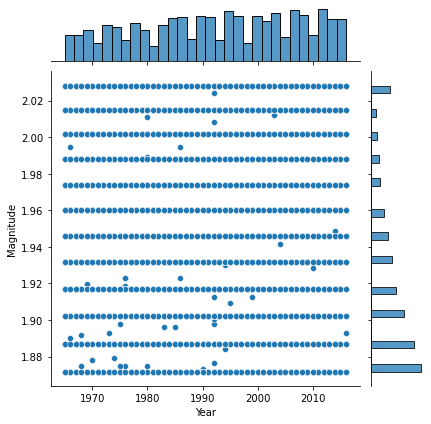

In [668]:
sns.jointplot(y=df_train['Magnitude'], x=df_train['Year'], data=df_train)

<AxesSubplot:>

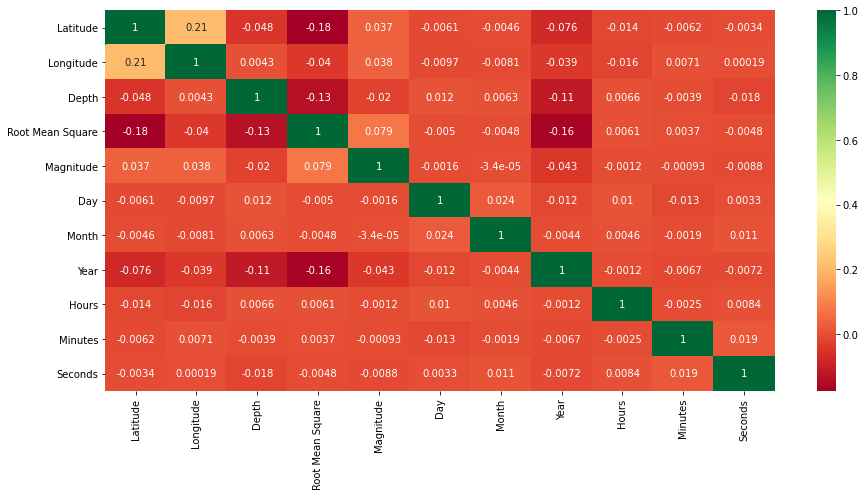

In [669]:
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')

In [670]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21033 entries, 0 to 21069
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          21033 non-null  float64
 1   Longitude         21033 non-null  float64
 2   Type              21033 non-null  object 
 3   Depth             21033 non-null  float64
 4   Magnitude Type    21033 non-null  object 
 5   Root Mean Square  21033 non-null  float64
 6   Source            21033 non-null  object 
 7   Location Source   21033 non-null  object 
 8   Magnitude Source  21033 non-null  object 
 9   Status            21033 non-null  object 
 10  Magnitude         21033 non-null  float64
 11  Day               21033 non-null  int64  
 12  Month             21033 non-null  int64  
 13  Year              21033 non-null  int64  
 14  Hours             21033 non-null  int64  
 15  Minutes           21033 non-null  int64  
 16  Seconds           21033 non-null  int64 

In [671]:
df_train.describe()

,Latitude,Longitude,Depth,Root Mean Square,Magnitude,Day,Month,Year,Hours,Minutes,Seconds
count,21033.000000,21033.000000,21033.000000,21033.000000,21033.000000,21033.000000,21033.000000,21033.000000,21033.000000,21033.000000,21033.000000
mean,1.651857,39.851109,42.492957,1.022889,1.923629,15.692769,6.542576,1992.635002,11.441687,29.337184,29.549137
std,30.080890,125.447699,34.937573,0.141734,0.048403,8.677067,3.451686,14.437966,6.889702,17.384864,17.403406
min,-66.448000,-179.996000,-1.100000,0.700000,1.871802,1.000000,1.000000,1965.000000,0.000000,0.000000,0.000000
25%,-18.696000,-76.138000,14.500000,0.940000,1.887070,8.000000,4.000000,1981.000000,5.000000,14.000000,14.000000
50%,-3.595000,103.983000,33.000000,1.022470,1.902108,16.000000,7.000000,1993.000000,11.000000,29.000000,30.000000
75%,26.124000,145.214100,53.700000,1.100000,1.945910,23.000000,10.000000,2005.000000,17.000000,44.000000,45.000000
max,86.005000,179.998000,112.400000,1.340000,2.028148,31.000000,12.000000,2016.000000,23.000000,59.000000,59.000000


In [672]:
df_test.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Magnitude
0,2/22/1976,7:47:59,3.166,99.015,Earthquake,180.0,NaN,NaN,MB,NaN,NaN,NaN,NaN,NaN,NaN,USP0000F5T,US,US,US,Reviewed,5.6
1,6/3/1998,15:47:08,43.679,-29.020,Earthquake,10.0,NaN,NaN,MWC,NaN,NaN,NaN,NaN,NaN,0.84,USP0008P8F,US,US,HRV,Reviewed,5.5
2,5/12/2003,3:03:05,1.142,98.911,Earthquake,77.6,NaN,345.0,MWB,NaN,NaN,57.3,NaN,NaN,0.88,USP000BX2T,US,US,US,Reviewed,5.5
3,10/26/2006,14:28:37,38.649,15.390,Earthquake,212.0,NaN,675.0,MWC,NaN,NaN,15.1,NaN,NaN,1.05,USP000EW2Z,US,US,GCMT,Reviewed,5.8
4,12/15/2000,16:44:48,38.457,31.351,Earthquake,10.0,NaN,174.0,MWC,NaN,NaN,NaN,NaN,NaN,1.24,USP000A64F,US,US,HRV,Reviewed,6.0


#### Encoding of categorical variables

In [673]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [674]:
pd.set_option('display.max_columns', None)

In [675]:
df_train.head()

,Latitude,Longitude,Depth,Root Mean Square,Magnitude,Day,Month,Year,Hours,Minutes,Seconds,Type_Explosion,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_OFFICIAL,Source_US,Source_UW,Location Source_CI,Location Source_GCMT,Location Source_GUC,Location Source_ISCGEM,Location Source_NC,Location Source_Other,Location Source_US,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_US,Magnitude Source_UW,Status_Reviewed
0,71.190,-8.263,10.0,0.95000,1.945910,21,5,2000,19,58,47,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,-7.310,155.282,33.0,1.20000,1.887070,3,5,1996,3,7,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,37.502,138.467,15.1,0.71000,1.902108,16,7,2007,6,37,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,52.122,-30.179,10.0,0.83000,1.931521,24,1,2004,13,1,46,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,-10.965,119.103,33.0,1.02247,1.887070,20,6,1980,18,51,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [676]:
X = df_train.iloc[:, df_train.columns != 'Magnitude']

In [677]:
X.head()

,Latitude,Longitude,Depth,Root Mean Square,Day,Month,Year,Hours,Minutes,Seconds,Type_Explosion,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_OFFICIAL,Source_US,Source_UW,Location Source_CI,Location Source_GCMT,Location Source_GUC,Location Source_ISCGEM,Location Source_NC,Location Source_Other,Location Source_US,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_US,Magnitude Source_UW,Status_Reviewed
0,71.190,-8.263,10.0,0.95000,21,5,2000,19,58,47,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,-7.310,155.282,33.0,1.20000,3,5,1996,3,7,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,37.502,138.467,15.1,0.71000,16,7,2007,6,37,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,52.122,-30.179,10.0,0.83000,24,1,2004,13,1,46,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,-10.965,119.103,33.0,1.02247,20,6,1980,18,51,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [678]:
Y = df_train.iloc[:, 4]

In [679]:
Y.head()

0    1.945910
1    1.887070
2    1.902108
3    1.931521
4    1.887070
Name: Magnitude, dtype: float64

#### Feature Selection

In [680]:
from sklearn.ensemble import ExtraTreesRegressor

In [681]:
model = ExtraTreesRegressor()

In [682]:
model.fit(X,Y)

ExtraTreesRegressor()

In [683]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

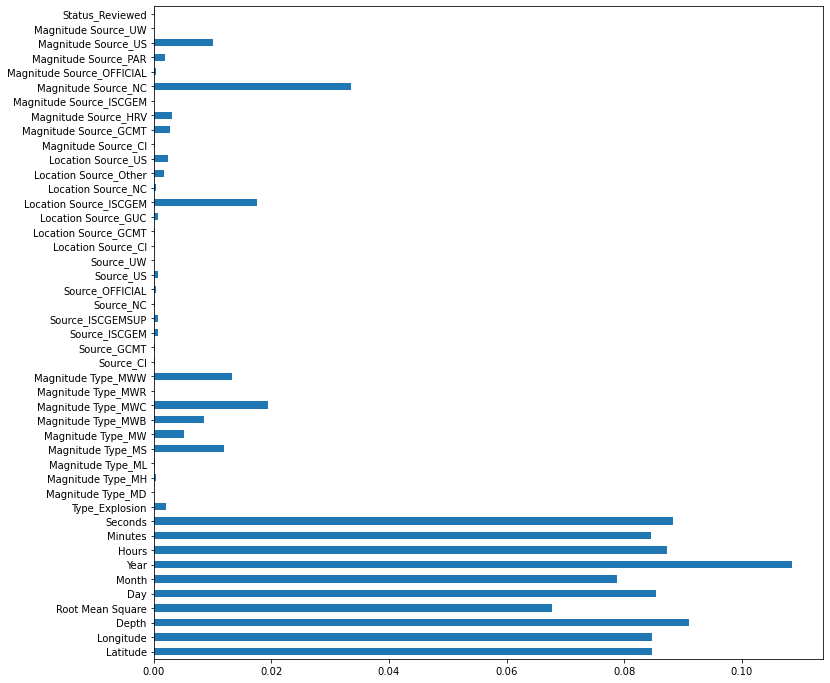

In [684]:
plt.figure(figsize=(12,12))
feat_importances.plot(kind='barh')
plt.show()

In [685]:
df_train.head()

,Latitude,Longitude,Depth,Root Mean Square,Magnitude,Day,Month,Year,Hours,Minutes,Seconds,Type_Explosion,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_OFFICIAL,Source_US,Source_UW,Location Source_CI,Location Source_GCMT,Location Source_GUC,Location Source_ISCGEM,Location Source_NC,Location Source_Other,Location Source_US,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_US,Magnitude Source_UW,Status_Reviewed
0,71.190,-8.263,10.0,0.95000,1.945910,21,5,2000,19,58,47,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,-7.310,155.282,33.0,1.20000,1.887070,3,5,1996,3,7,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,37.502,138.467,15.1,0.71000,1.902108,16,7,2007,6,37,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,52.122,-30.179,10.0,0.83000,1.931521,24,1,2004,13,1,46,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,-10.965,119.103,33.0,1.02247,1.887070,20,6,1980,18,51,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [686]:
df_train = df_train.drop(['Status_Reviewed', 'Magnitude Source_UW', 'Magnitude Source_PAR', 'Magnitude Source_OFFICIAL', 'Magnitude Source_ISCGEM', 'Magnitude Source_HRV', 'Magnitude Source_GCMT', 'Magnitude Source_CI', 'Location Source_US', 'Location Source_Other', 'Location Source_NC', 'Location Source_GUC', 'Location Source_GCMT', 'Location Source_CI', 'Source_UW', 'Source_US', 'Source_OFFICIAL', 'Source_NC', 'Source_ISCGEMSUP', 'Source_ISCGEM', 'Source_GCMT', 'Source_CI', 'Magnitude Type_MWR', 'Magnitude Type_ML', 'Magnitude Type_MH', 'Magnitude Type_MD', 'Type_Explosion'], axis = 1)

In [687]:
df_train.head()

,Latitude,Longitude,Depth,Root Mean Square,Magnitude,Day,Month,Year,Hours,Minutes,Seconds,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWW,Location Source_ISCGEM,Magnitude Source_NC,Magnitude Source_US
0,71.190,-8.263,10.0,0.95000,1.945910,21,5,2000,19,58,47,0,0,0,1,0,0,0,0
1,-7.310,155.282,33.0,1.20000,1.887070,3,5,1996,3,7,13,0,0,0,1,0,0,0,0
2,37.502,138.467,15.1,0.71000,1.902108,16,7,2007,6,37,40,0,0,0,1,0,0,0,0
3,52.122,-30.179,10.0,0.83000,1.931521,24,1,2004,13,1,46,0,0,1,0,0,0,0,1
4,-10.965,119.103,33.0,1.02247,1.887070,20,6,1980,18,51,31,0,0,0,0,0,0,0,1


## Feature Scaling

In [688]:
from sklearn.preprocessing import StandardScaler

In [689]:
#Instantiating StandardScaler
sc = StandardScaler()

In [690]:
X_train = df_train.iloc[:, df_train.columns != 'Magnitude']

In [691]:
Y_train = df_train.iloc[:, 4]

In [692]:
#Fitting the dataframe X_train onto the standard scaler
df_train_continuous_features_transformed = sc.fit_transform(X_train)

In [693]:
df_train_continuous_features_transformed

array([[ 2.31175995, -0.38354831, -0.93005113, ..., -0.35406377,
        -0.1521681 , -0.89951915],
       [-0.29793236,  0.92017339, -0.27171843, ..., -0.35406377,
        -0.1521681 , -0.89951915],
       [ 1.19181964,  0.78613028, -0.78407301, ..., -0.35406377,
        -0.1521681 , -0.89951915],
       ...,
       [-0.28254016,  0.71571679,  2.00096056, ..., -0.35406377,
        -0.1521681 ,  1.11170507],
       [-0.23672925,  0.90412648, -0.35758791, ...,  2.82434995,
        -0.1521681 , -0.89951915],
       [-2.07142606, -0.52368972, -0.93005113, ..., -0.35406377,
        -0.1521681 , -0.89951915]])

In [694]:
df_train_continuous_features_scaled = pd.DataFrame({X_train.columns[0]: df_train_continuous_features_transformed[:, 0], X_train.columns[1]: df_train_continuous_features_transformed[:, 1], X_train.columns[2]: df_train_continuous_features_transformed[:, 2], X_train.columns[3]: df_train_continuous_features_transformed[:, 3], X_train.columns[4]: df_train_continuous_features_transformed[:, 4], X_train.columns[5]: df_train_continuous_features_transformed[:, 5], X_train.columns[6]: df_train_continuous_features_transformed[:, 6], X_train.columns[7]: df_train_continuous_features_transformed[:, 7], X_train.columns[8]: df_train_continuous_features_transformed[:, 8], X_train.columns[9]: df_train_continuous_features_transformed[:, 9], X_train.columns[10]: df_train_continuous_features_transformed[:, 10], X_train.columns[11]: df_train_continuous_features_transformed[:, 11], X_train.columns[12]: df_train_continuous_features_transformed[:, 12], X_train.columns[13]: df_train_continuous_features_transformed[:, 13], X_train.columns[14]: df_train_continuous_features_transformed[:, 14], X_train.columns[15]: df_train_continuous_features_transformed[:, 15], X_train.columns[16]: df_train_continuous_features_transformed[:, 16], X_train.columns[17]: df_train_continuous_features_transformed[:, 17]})

In [695]:
df_train_continuous_features_scaled.head(10)

,Latitude,Longitude,Depth,Root Mean Square,Day,Month,Year,Hours,Minutes,Seconds,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWW,Location Source_ISCGEM,Magnitude Source_NC,Magnitude Source_US
0,2.311760,-0.383548,-0.930051,-0.514280,0.611653,-0.446916,0.510125,1.097071,1.648762,1.002751,-0.280088,-0.701064,-0.343689,1.766374,-0.303781,-0.354064,-0.152168,-0.899519
1,-0.297932,0.920173,-0.271718,1.249634,-1.462830,-0.446916,0.233071,-1.225291,-1.284894,-0.950936,-0.280088,-0.701064,-0.343689,1.766374,-0.303781,-0.354064,-0.152168,-0.899519
2,1.191820,0.786130,-0.784073,-2.207637,0.035408,0.132525,0.994970,-0.789848,0.440786,0.600521,-0.280088,-0.701064,-0.343689,1.766374,-0.303781,-0.354064,-0.152168,-0.899519
3,1.677854,-0.558255,-0.930051,-1.360958,0.957401,-1.605797,0.787179,0.226185,-1.630030,0.945289,-0.280088,-0.701064,2.909604,-0.566131,-0.303781,-0.354064,-0.152168,1.111705
4,-0.419441,0.631767,-0.271718,-0.002957,0.496404,-0.157195,-0.875144,0.951924,1.246103,0.083369,-0.280088,-0.701064,-0.343689,-0.566131,-0.303781,-0.354064,-0.152168,1.111705
5,-0.164090,0.820424,-0.930051,-1.149289,0.150657,0.711966,0.648652,-0.064110,-0.537100,-0.376322,-0.280088,-0.701064,-0.343689,1.766374,-0.303781,-0.354064,-0.152168,-0.899519
6,-0.348065,0.933398,-0.271718,-0.002957,0.265906,1.291407,-1.152198,-1.225291,-0.307009,-1.697934,3.570302,-0.701064,-0.343689,-0.566131,-0.303781,-0.354064,-0.152168,1.111705
7,-0.575331,-0.891710,-0.643820,-1.219845,-0.079841,0.422245,1.618341,-1.370438,1.706284,-1.640473,-0.280088,-0.701064,2.909604,-0.566131,-0.303781,-0.354064,-0.152168,1.111705
8,-1.447427,0.388880,-0.930051,-1.925411,1.072650,-1.316077,1.133497,0.661628,-1.227372,-1.697934,-0.280088,-0.701064,-0.343689,1.766374,-0.303781,-0.354064,-0.152168,1.111705
9,0.979886,0.812365,-0.566537,-0.161497,0.611653,-0.446916,-0.043982,0.226185,1.303626,0.485598,-0.280088,1.426404,-0.343689,-0.566131,-0.303781,-0.354064,-0.152168,-0.899519


In [696]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2342 non-null   object 
 1   Time                        2342 non-null   object 
 2   Latitude                    2342 non-null   float64
 3   Longitude                   2342 non-null   float64
 4   Type                        2342 non-null   object 
 5   Depth                       2342 non-null   float64
 6   Depth Error                 435 non-null    float64
 7   Depth Seismic Stations      714 non-null    float64
 8   Magnitude Type              2341 non-null   object 
 9   Magnitude Error             23 non-null     float64
 10  Magnitude Seismic Stations  225 non-null    float64
 11  Azimuthal Gap               721 non-null    float64
 12  Horizontal Distance         150 non-null    float64
 13  Horizontal Error            104 n

In [697]:
df_test.isnull().sum()

Date                             0
Time                             0
Latitude                         0
Longitude                        0
Type                             0
Depth                            0
Depth Error                   1907
Depth Seismic Stations        1628
Magnitude Type                   1
Magnitude Error               2319
Magnitude Seismic Stations    2117
Azimuthal Gap                 1621
Horizontal Distance           2192
Horizontal Error              2238
Root Mean Square               615
ID                               0
Source                           0
Location Source                  0
Magnitude Source                 0
Status                           0
Magnitude                        0
dtype: int64

In [698]:
df_test = df_test.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error'], axis=1)

In [699]:
df_test.isnull().sum()

Date                  0
Time                  0
Latitude              0
Longitude             0
Type                  0
Depth                 0
Magnitude Type        1
Root Mean Square    615
ID                    0
Source                0
Location Source       0
Magnitude Source      0
Status                0
Magnitude             0
dtype: int64

In [700]:
df_test = df_test.dropna(subset=['Magnitude Type'])

In [701]:
df_test = df_test.drop(['ID'], axis = 1)

In [702]:
df_test['Root Mean Square'] = df_test['Root Mean Square'].fillna(df_test['Root Mean Square'].mean())

In [703]:
df_test.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Magnitude           0
dtype: int64

In [704]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_test[feature].value_counts())
        print()

Feature :  Type
Earthquake           2322
Nuclear Explosion      19
Name: Type, dtype: int64

Feature :  Magnitude Type
MW     783
MWC    553
MB     380
MWB    235
MWW    206
MS     172
ML       6
MWR      5
MD       1
Name: Magnitude Type, dtype: int64

Feature :  Source
US           2085
ISCGEM        228
ISCGEMSUP      10
CI              7
NC              4
GCMT            3
AK              1
UW              1
NN              1
OFFICIAL        1
Name: Source, dtype: int64

Feature :  Location Source
US        2057
ISCGEM     238
CI           7
GUC          6
NC           4
AEIC         3
GCMT         3
PGC          3
UNM          3
HVO          2
ATH          2
TUL          1
AGS          1
CASC         1
TAP          1
TEH          1
ROM          1
ISK          1
MDD          1
AEI          1
UW           1
NN           1
US_WEL       1
AK           1
Name: Location Source, dtype: int64

Feature :  Magnitude Source
US          1046
HRV          843
ISCGEM       238
GCMT         141

In [705]:
df_test["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

In [706]:
#df_test_1["Source"].value_counts().keys().tolist()
df_test.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,2/22/1976,7:47:59,3.166,99.015,Earthquake,180.0,MB,1.025625,US,US,US,Reviewed,5.6
1,6/3/1998,15:47:08,43.679,-29.020,Earthquake,10.0,MWC,0.840000,US,US,HRV,Reviewed,5.5
2,5/12/2003,3:03:05,1.142,98.911,Earthquake,77.6,MWB,0.880000,US,US,US,Reviewed,5.5
3,10/26/2006,14:28:37,38.649,15.390,Earthquake,212.0,MWC,1.050000,US,US,GCMT,Reviewed,5.8
4,12/15/2000,16:44:48,38.457,31.351,Earthquake,10.0,MWC,1.240000,US,US,HRV,Reviewed,6.0


In [734]:
df_test_1 = df_test.copy()

In [735]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_test_1[feature].value_counts())
        print()

Feature :  Type
Earthquake    2322
Explosion       19
Name: Type, dtype: int64

Feature :  Magnitude Type
MW     783
MWC    553
MB     380
MWB    235
MWW    206
MS     172
ML       6
MWR      5
MD       1
Name: Magnitude Type, dtype: int64

Feature :  Source
US           2085
ISCGEM        228
ISCGEMSUP      10
CI              7
NC              4
GCMT            3
AK              1
UW              1
NN              1
OFFICIAL        1
Name: Source, dtype: int64

Feature :  Location Source
US        2057
ISCGEM     238
CI           7
GUC          6
NC           4
AEIC         3
GCMT         3
PGC          3
UNM          3
HVO          2
ATH          2
TUL          1
AGS          1
CASC         1
TAP          1
TEH          1
ROM          1
ISK          1
MDD          1
AEI          1
UW           1
NN           1
US_WEL       1
AK           1
Name: Location Source, dtype: int64

Feature :  Magnitude Source
US          1046
HRV          843
ISCGEM       238
GCMT         141
NC           

In [736]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time' or feature == 'Location Source':
        pass
    else:
        print(feature)
        x = df_test_1[feature].value_counts().keys().tolist()
        y = df_test_1[feature].value_counts().tolist()
        print(x)
        print(y)
        for i in range(len(x)):
            if y[i] < 4:
                index_names = df_test_1[df_test_1[feature] == x[i]].index
                df_test_1.drop(index_names, inplace = True)
        x = df_test_1[feature].value_counts().keys().tolist()
        y = df_test_1[feature].value_counts().tolist()
        print(x)
        print(y)
    x = None
    y = None

Type
['Earthquake', 'Explosion']
[2322, 19]
['Earthquake', 'Explosion']
[2322, 19]
Magnitude Type
['MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS', 'ML', 'MWR', 'MD']
[783, 553, 380, 235, 206, 172, 6, 5, 1]
['MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS', 'ML', 'MWR']
[783, 553, 380, 235, 206, 172, 6, 5]
Source
['US', 'ISCGEM', 'ISCGEMSUP', 'CI', 'NC', 'GCMT', 'AK', 'NN', 'OFFICIAL']
[2085, 228, 10, 7, 4, 3, 1, 1, 1]
['US', 'ISCGEM', 'ISCGEMSUP', 'CI', 'NC']
[2085, 228, 10, 7, 4]
Magnitude Source
['US', 'HRV', 'ISCGEM', 'GCMT', 'NC', 'CI', 'GUC', '1000', 'NIED']
[1046, 843, 238, 138, 57, 7, 3, 1, 1]
['US', 'HRV', 'ISCGEM', 'GCMT', 'NC', 'CI']
[1046, 843, 238, 138, 57, 7]
Status
['Reviewed', 'Automatic']
[2091, 238]
['Reviewed', 'Automatic']
[2091, 238]


In [738]:
df_test_1['Magnitude Type'].value_counts()

MW     782
MWC    550
MB     380
MWB    235
MWW    205
MS     172
ML       4
MWR      1
Name: Magnitude Type, dtype: int64

In [718]:
x = df_test_1['Location Source'].value_counts().keys().tolist()
y = df_test_1['Location Source'].value_counts().tolist()
for i in range(len(x)):
    if y[i] < 29:
        df_test_1['Location Source'].replace({x[i]: "Other"}, inplace=True)

In [719]:
df_test_1['Day'] = pd.to_datetime(df_test_1.Date, format="%m/%d/%Y").dt.day

In [720]:
df_test_1['Month'] = pd.to_datetime(df_test_1.Date, format="%m/%d/%Y").dt.month

In [721]:
df_test_1['Year'] = pd.to_datetime(df_test_1.Date, format="%m/%d/%Y").dt.year

In [722]:
df_test_1.drop(['Date'], axis=1, inplace=True)

In [723]:
df_test_1['Hours'] = pd.to_datetime(df_test_1['Time'], utc=True).dt.hour

In [724]:
df_test_1['Minutes'] = pd.to_datetime(df_test_1['Time'], utc=True).dt.minute

In [725]:
df_test_1['Seconds'] = pd.to_datetime(df_test_1['Time'], utc=True).dt.second

In [726]:
df_test_1.drop(['Time'], axis=1, inplace=True)

In [727]:
df_test_1 = pd.get_dummies(df_test_1, drop_first=True)

In [728]:
df_test_1.columns

Index(['Latitude', 'Longitude', 'Depth', 'Root Mean Square', 'Magnitude',
       'Day', 'Month', 'Year', 'Hours', 'Minutes', 'Seconds', 'Type_Explosion',
       'Magnitude Type_ML', 'Magnitude Type_MS', 'Magnitude Type_MW',
       'Magnitude Type_MWB', 'Magnitude Type_MWC', 'Magnitude Type_MWR',
       'Magnitude Type_MWW', 'Source_ISCGEM', 'Source_ISCGEMSUP', 'Source_NC',
       'Source_US', 'Location Source_Other', 'Location Source_US',
       'Magnitude Source_GCMT', 'Magnitude Source_HRV',
       'Magnitude Source_ISCGEM', 'Magnitude Source_NC', 'Magnitude Source_US',
       'Status_Reviewed'],
      dtype='object')

In [260]:
X_test = df_test.iloc[:, df_test.columns != 'Magnitude']

In [261]:
Y_test = df_test.iloc[:, 4]

In [262]:
X.head()

,Latitude,Longitude,Depth,Root Mean Square,Day,Month,Year,Hours,Minutes,Seconds,Type_Explosion,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_OFFICIAL,Source_US,Source_UW,Location Source_CI,Location Source_GCMT,Location Source_GUC,Location Source_ISCGEM,Location Source_NC,Location Source_Other,Location Source_US,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_US,Magnitude Source_UW,Status_Reviewed
0,71.190,-8.263,10.0,0.95000,21,5,2000,19,58,47,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,-7.310,155.282,33.0,1.20000,3,5,1996,3,7,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,37.502,138.467,15.1,0.71000,16,7,2007,6,37,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,52.122,-30.179,10.0,0.83000,24,1,2004,13,1,46,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,-10.965,119.103,33.0,1.02247,20,6,1980,18,51,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [263]:
X = X.drop(['Status_Reviewed', 'Magnitude Source_ISCGEM', 'Magnitude Source_HRV', 'Source_US', 'Source_NC', 'Source_ISCGEMSUP', 'Source_ISCGEM', 'Magnitude Type_MWR', 'Magnitude Type_ML', 'Type_Explosion', 'Location Source_Other', 'Location Source_US'], axis = 1)

In [264]:
df_train_continuous_features_scaled.columns

Index(['Latitude', 'Longitude', 'Depth', 'Root Mean Square', 'Day', 'Month',
       'Year', 'Hours', 'Minutes', 'Seconds', 'Magnitude Type_MS',
       'Magnitude Type_MW', 'Magnitude Type_MWB', 'Magnitude Type_MWC',
       'Magnitude Type_MWW', 'Location Source_ISCGEM', 'Magnitude Source_NC',
       'Magnitude Source_US'],
      dtype='object')

In [265]:
X.columns

Index(['Latitude', 'Longitude', 'Depth', 'Root Mean Square', 'Day', 'Month',
       'Year', 'Hours', 'Minutes', 'Seconds', 'Magnitude Type_MD',
       'Magnitude Type_MH', 'Magnitude Type_MS', 'Magnitude Type_MW',
       'Magnitude Type_MWB', 'Magnitude Type_MWC', 'Magnitude Type_MWW',
       'Source_CI', 'Source_GCMT', 'Source_OFFICIAL', 'Source_UW',
       'Location Source_CI', 'Location Source_GCMT', 'Location Source_GUC',
       'Location Source_ISCGEM', 'Location Source_NC', 'Magnitude Source_CI',
       'Magnitude Source_GCMT', 'Magnitude Source_NC',
       'Magnitude Source_OFFICIAL', 'Magnitude Source_PAR',
       'Magnitude Source_US', 'Magnitude Source_UW'],
      dtype='object')

In [132]:
#Fitting the dataframe X_train onto the standard scaler
df_test_continuous_features_transformed = sc.transform(X)

ValueError: X has 33 features, but StandardScaler is expecting 18 features as input.

In [ ]:
df_test_continuous_features_transformed

In [ ]:
df_test_continuous_features_scaled = pd.DataFrame({X.columns[0]: df_test_continuous_features_transformed[:, 0], X.columns[1]: df_test_continuous_features_transformed[:, 1], X.columns[2]: df_test_continuous_features_transformed[:, 2], X.columns[3]: df_test_continuous_features_transformed[:, 3], X.columns[4]: df_test_continuous_features_transformed[:, 4], X.columns[5]: df_test_continuous_features_transformed[:, 5], X.columns[6]: df_test_continuous_features_transformed[:, 6], X.columns[7]: df_test_continuous_features_transformed[:, 7], X.columns[8]: df_test_continuous_features_transformed[:, 8], X.columns[9]: df_test_continuous_features_transformed[:, 9], X.columns[10]: df_test_continuous_features_transformed[:, 10], X.columns[11]: df_test_continuous_features_transformed[:, 11], X.columns[12]: df_test_continuous_features_transformed[:, 12], X.columns[13]: df_test_continuous_features_transformed[:, 13], X.columns[14]: df_test_continuous_features_transformed[:, 14], X.columns[15]: df_test_continuous_features_transformed[:, 15], X.columns[16]: df_test_continuous_features_transformed[:, 16], X.columns[17]: df_test_continuous_features_transformed[:, 17]})

In [ ]:
df_test_continuous_features_scaled.head(10)

#### Model Building

*We will create a Linear Regression model*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
#Fitting the training data on the Linear Regression model
regressor.fit(df_train_continuous_features_scaled, Y_train)

In [ ]:
#Intercept of the best fit line of regression
print("Intercept : ", regressor.intercept_)

In [ ]:
regressor.coef_

In [ ]:
y_pred = regressor.predict(df_test_continuous_features_scaled)

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y, y_pred))
print("Mean squared error : ", metrics.mean_squared_error(Y, y_pred))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y, y_pred)))
print("R squared error : ", metrics.mean_squared_error(Y, y_pred))

In [ ]:
sns.distplot(Y-y_pred)

The distplot of the difference the y_test and y_pred is almost a Gaussian distribution

*Now we will build RandomForestRegressor model*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

We will perform hyperparameter tuning for Random Forest Regressor model

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

In [ ]:
rfc = RandomForestRegressor()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state = 42, verbose = 2, n_jobs=1)

In [ ]:
rsc.fit(X_train, y_train)

In [ ]:
prediction = rsc.predict(X_test)
prediction

In [ ]:
y_test

In [ ]:
rsc.best_params_

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, prediction))
print("Mean squared error : ", metrics.mean_squared_error(y_test, prediction))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
prediction[2109], y_test.tolist()[2109]

In [ ]:
prediction[1109], y_test.tolist()[1109]

In [ ]:
prediction[709], y_test.tolist()[709]